<a href="https://colab.research.google.com/github/Manik400/ML_DL/blob/main/cd_Classifier_CNN84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [2]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
# downloading the data from kaggle
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:06<00:00, 170MB/s]
100% 1.06G/1.06G [00:06<00:00, 166MB/s]


In [4]:
#extrating th data from zip file
import zipfile
zipref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zipref.extractall('/content')
zipref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers


In [6]:
#genrators to generat ata from images

# Create an ImageDataGenerator for the training set with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,       # Normalize the data to [0, 1]
    rotation_range=20,
    horizontal_flip=True,
    fill_mode='nearest',
    vertical_flip=False
)

# Create an ImageDataGenerator for the validation set without augmentation
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load the training data with augmentation
train_ds = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary'
)

# Load the validation data without augmentation
validation_ds = validation_datagen.flow_from_directory(
    '/content/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [7]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(4,4),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='valid'))


model.add(Conv2D(256,kernel_size=(4,4),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(64, kernel_regularizer=regularizers.l1(0.01), activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer = 'adam' , loss ='binary_crossentropy' , metrics = ['accuracy'])

In [10]:

early_stopping = EarlyStopping(
    monitor='val_loss',   # Monitor the validation loss
    patience=3,           # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore the best model weights
)


# history = model.fit(train_ds,epochs=10,validation_data=validation_ds)
history = model.fit(
    train_ds,
    epochs=5,  # You can set a higher number of epochs
    validation_data=validation_ds,
    callbacks=[early_stopping]  # Add the early stopping callback
)


Epoch 1/5
313/313 [==============================] - 368s 1s/step - loss: 12.1211 - accuracy: 0.5794 - val_loss: 5.8072 - val_accuracy: 0.5714
Epoch 2/5
313/313 [==============================] - 352s 1s/step - loss: 5.2882 - accuracy: 0.6471 - val_loss: 4.8293 - val_accuracy: 0.6754
Epoch 3/5
313/313 [==============================] - 350s 1s/step - loss: 4.4440 - accuracy: 0.7363 - val_loss: 4.7068 - val_accuracy: 0.5436
Epoch 4/5
313/313 [==============================] - 362s 1s/step - loss: 4.1051 - accuracy: 0.8063 - val_loss: 4.3334 - val_accuracy: 0.5928
Epoch 5/5
313/313 [==============================] - 349s 1s/step - loss: 3.7724 - accuracy: 0.8490 - val_loss: 3.6453 - val_accuracy: 0.8316


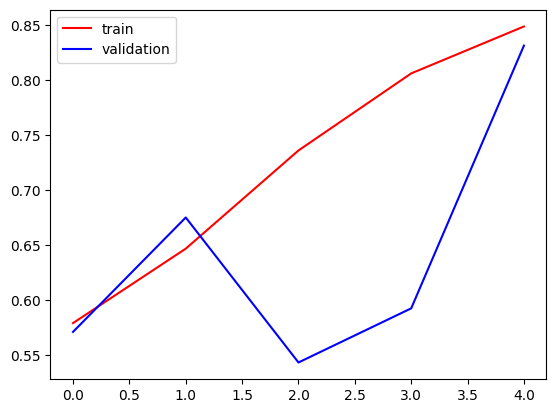

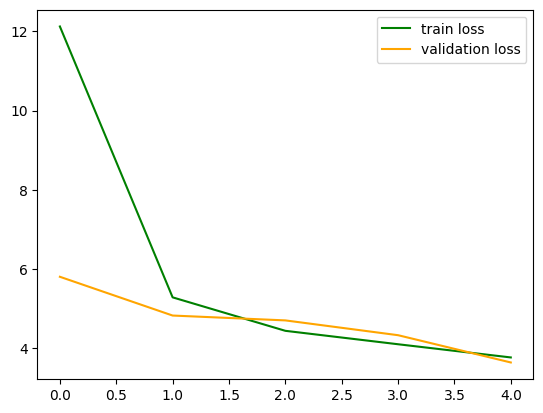

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

plt.plot(history.history['loss'], color='green', label='train loss')
plt.plot(history.history['val_loss'], color='orange', label='validation loss')
plt.legend()
plt.show()
